<a href="https://colab.research.google.com/github/Malinovskiy159/web/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [32]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [33]:
raw_data = pd.read_csv('/content/drive/MyDrive/datasets/FastFoodRestaurants.csv')

In [34]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    9535 non-null   object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [35]:
data = raw_data.dropna(subset=['latitude', 'longitude'])
coordinates = data[['latitude', 'longitude']]
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

In [36]:
def evaluate_clustering(data, labels):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
    else:
        silhouette, davies_bouldin = -1, -1  # Invalid for single cluster
    return silhouette, davies_bouldin

In [37]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_model.fit_predict(coordinates_scaled)
silhouette, davies_bouldin = evaluate_clustering(coordinates_scaled, kmeans_labels)
print(f"Silhouette Score: {silhouette:.3f}, Davies-Bouldin Score: {davies_bouldin:.3f}")

Silhouette Score: 0.464, Davies-Bouldin Score: 0.679


In [38]:
dbscan_model = DBSCAN(eps=0.03, min_samples=10)
dbscan_labels = dbscan_model.fit_predict(coordinates_scaled)
silhouette, davies_bouldin = evaluate_clustering(coordinates_scaled, dbscan_labels)
print(f"Silhouette Score: {silhouette:.3f}, Davies-Bouldin Score: {davies_bouldin:.3f}")

Silhouette Score: 0.120, Davies-Bouldin Score: 1.894


In [39]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Оценка bandwidth на подмножестве данных для ускорения
sample_size = 10000  # Ограничим выборку для расчета bandwidth
sample_data = coordinates_scaled[np.random.choice(coordinates_scaled.shape[0], sample_size, replace=False)]

# Вычисляем оптимальный bandwidth на меньшем наборе данных
bandwidth = estimate_bandwidth(sample_data, quantile=0.1, n_samples=sample_size)
print(f"Оптимальный bandwidth: {bandwidth:.4f}")

# Кластеризация с MeanShift на полном наборе данных с рассчитанным bandwidth
meanshift_model = MeanShift(bandwidth=bandwidth)
meanshift_labels = meanshift_model.fit_predict(coordinates_scaled)

# Оценка качества кластеризации
silhouette, davies_bouldin = evaluate_clustering(coordinates_scaled, meanshift_labels)
print(f"Silhouette Score: {silhouette:.3f}, Davies-Bouldin Score: {davies_bouldin:.3f}")


Оптимальный bandwidth: 0.6456
Silhouette Score: 0.375, Davies-Bouldin Score: 0.428


In [40]:
def visualize_clusters(data, labels, method):
    """Visualize clusters using matplotlib for different methods."""
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data['longitude'], data['latitude'], c=labels, cmap='viridis', s=10)
    plt.colorbar(scatter, label='Cluster Label')
    plt.title(f'{method} Cluster Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

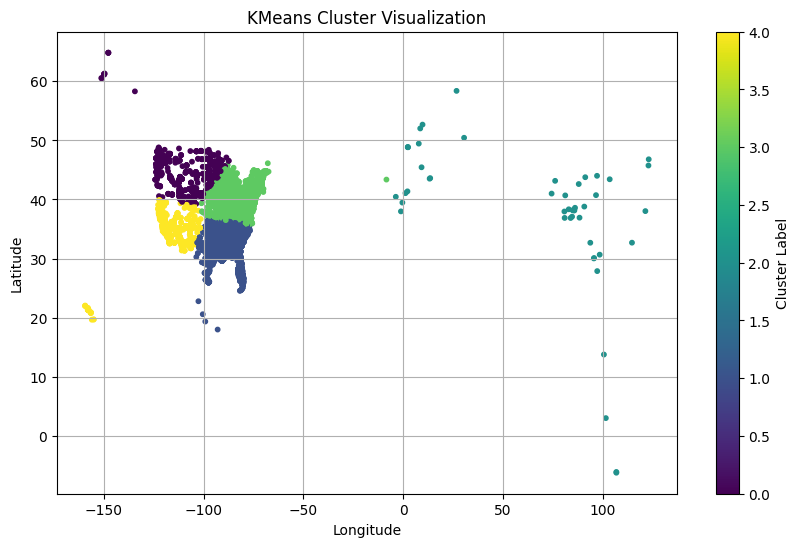

In [41]:
raw_data['kmeans_cluster'] = kmeans_labels
visualize_clusters(raw_data, kmeans_labels, 'KMeans')

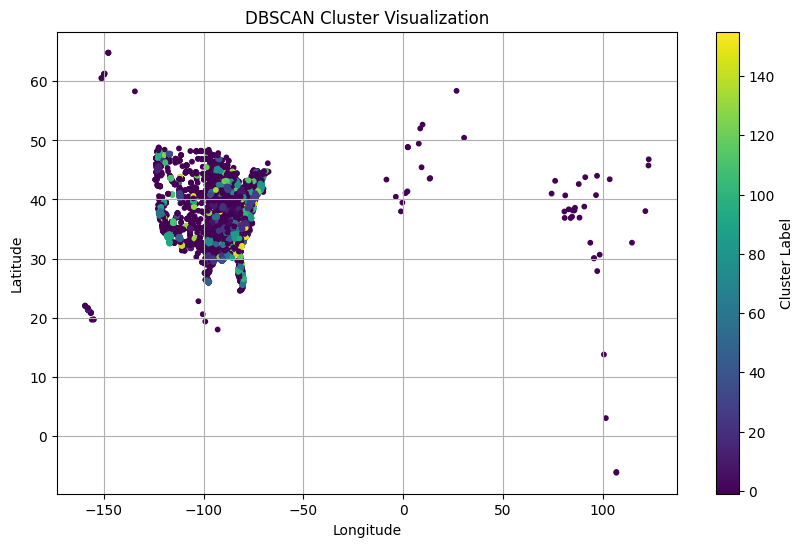

In [42]:
# Визуализация DBSCAN
raw_data['dbscan_cluster'] = dbscan_labels
visualize_clusters(raw_data, dbscan_labels, 'DBSCAN')

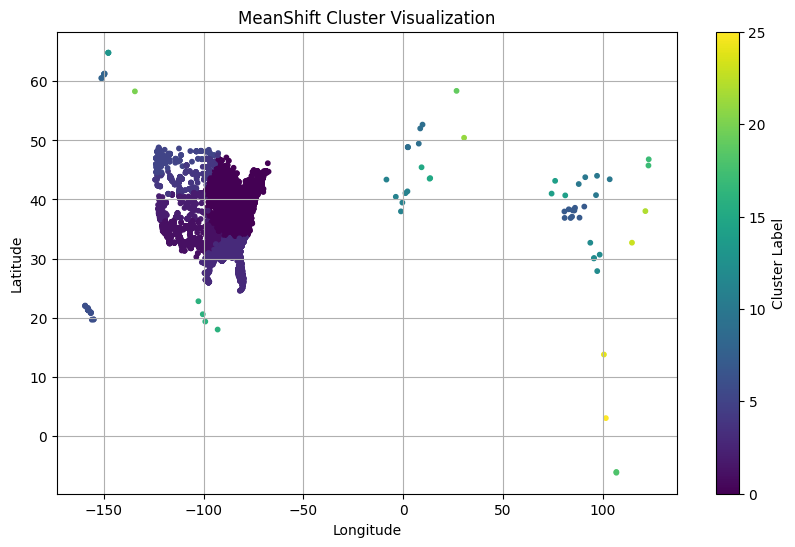

In [43]:
# Визуализация MeanShift
raw_data['meanshift_cluster'] = meanshift_labels
visualize_clusters(raw_data, meanshift_labels, 'MeanShift')